# SI618 Lab 9

In this lab, we will be working with three different datasets

1. The UCI data set about wine quality from lab 8. The dataset comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
2. Selected gender inequality related data from global development database downloaded from the World Bank data bank (https://databank.worldbank.org/reports.aspx?source=world-development-indicators#). Read the metadata file for more information about the two variables being used.
3. A monthly time series dataset of the number of domestic airline passengers (in 000s) in the United States collected from https://www.transtats.bts.gov/TRAFFIC/

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import *

## Part 1: Wine Quality

### Question 1: (15 points) Load the wine quality dataset. Define a new column **isgood** based on the **quality** column with wines with a quality rating higher than 5 being *good* and the rest being *bad*. 
  * Use a JointGrid approach look at the relationship between sulphates and alcohol.
  * Look at the same relationship separately for *good* and *bad* wines with separate JointGrids
  * What do you observe? 

Hint: When appropriate, create additional figures that allow you to exclude the effect of outliers


In [4]:
wine = pd.read_csv('winequality-red.csv')
wine['isgood'] = np.where(wine['quality'] > 5, 'good','bad')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isgood
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


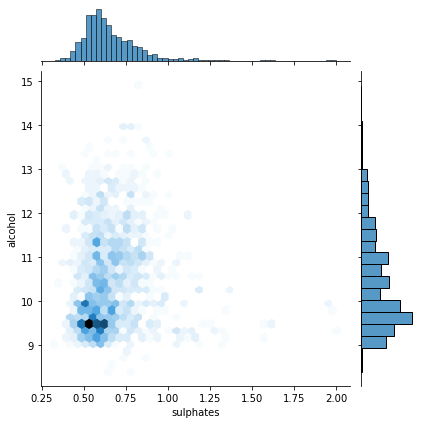

In [7]:
# q1-1
sns.jointplot(x='sulphates',y='alcohol',data=wine,kind="hex")

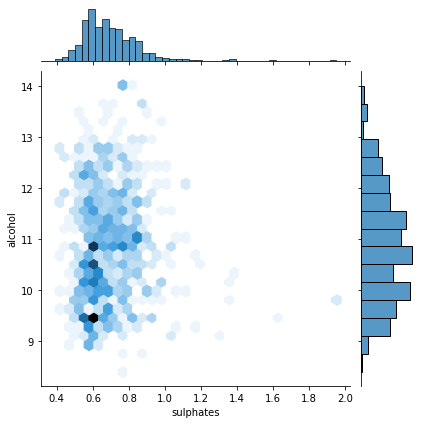

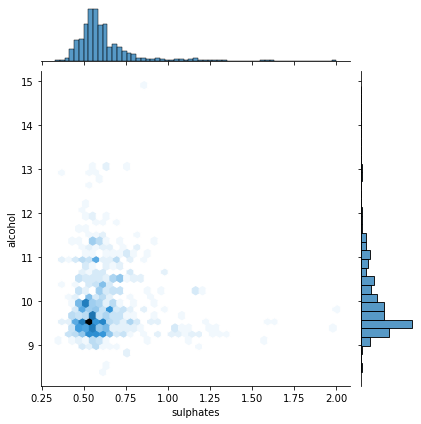

In [6]:
# q1-2
sns.jointplot(x='sulphates',y='alcohol',data=wine.query('isgood == "good"'),kind="hex")
sns.jointplot(x='sulphates',y='alcohol',data=wine.query('isgood == "bad"'),kind="hex")

\# q1-3

Here are my observations:

+ Good wine genereally has higher amonut of alcohol in wine.
+ Comparing to bad wine, good wine has a "fatter" and wider distribution over both sulphates and alcohol.

### Question 2: (15 points) Use OLS to perform either a regression or an ANOVA for the relationship between sulphates with (i) categorical variable of wine quality and (ii) original quality. Interpret your results.

In [11]:
# OLS regression
model1 = smf.ols('sulphates ~ isgood', data=wine).fit() # categorical variable of wine quality
model2 = smf.ols('sulphates ~ quality', data=wine).fit() # original quality
model1.summary(), model2.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              sulphates   R-squared:                       0.048
 Model:                            OLS   Adj. R-squared:                  0.047
 Method:                 Least Squares   F-statistic:                     79.74
 Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.15e-18
 Time:                        23:36:57   Log-Likelihood:                 608.57
 No. Observations:                1599   AIC:                            -1213.
 Df Residuals:                    1597   BIC:                            -1202.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------------

`model1` is the fitted model between sulphates and categorical variable of wine quality while `model2` is the fitted model between sulphates and original quality.

My interpretations for the OLS regression result above are:

+ Since the value of R square is quite small for both `model1` and `model2`, we can say that the linear model does not fit this two varibales well.
+ The fitted result for `model1` is $\texttt{sulphates} = 0.0741 \texttt{isgood (good = 1)} + 0.6185$. 
The fitted result for `model2` is $\texttt{sulphates} = 0.0528 \texttt{quality} + 0.3607$.
+ For both `model1` and `model2`, the parameters $k$ and $b$ for model $y = kx + b$ have a p-value close to 0, indicating that both independent varibles (`isgood` and `quality`) make an influence on the deviation of dependent variable `sulphates`.

## Part 2: Trends in Gender Inequality

In [39]:
gender = pd.read_csv('gender_world_development.csv')
gender.head()

,Unnamed: 0,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,0,Afghanistan,AFG,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,...,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,NaN,27.868852,27.016129
1,4,Afghanistan,AFG,Women Business and the Law Index Score (scale ...,SG.LAW.INDX,NaN,NaN,NaN,NaN,NaN,...,28.750000,28.750000,28.750000,28.750000,28.750000,38.125000,38.125000,38.125000,38.125000,38.125000
2,13,Albania,ALB,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,...,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143,27.857143,29.508197,29.508197
3,17,Albania,ALB,Women Business and the Law Index Score (scale ...,SG.LAW.INDX,NaN,NaN,NaN,NaN,NaN,...,85.625000,85.625000,85.625000,85.625000,85.625000,91.250000,91.250000,91.250000,91.250000,91.250000
4,26,Algeria,DZA,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,...,7.969152,31.601732,31.601732,31.601732,31.601732,31.601732,25.757576,25.757576,25.757576,25.757576


### Question 3: (15 points) Visualize the relationship between the representation of women in the parliment (**SG.GEN.PARL.ZS**) and the legal and regulatory support for providing economic opportunities for women (**SG.LAW.INDX**) in the year 2020 using a scatter plot drawn with plotnine (*geom_point*). Then overlay a linear regression fit with the standard error confidence intervals on the same plot (*geom smooth*). Remember to label and resize the figure as necessary to make it readable. What do you observe?   

D:\Software\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 84 rows containing missing values.


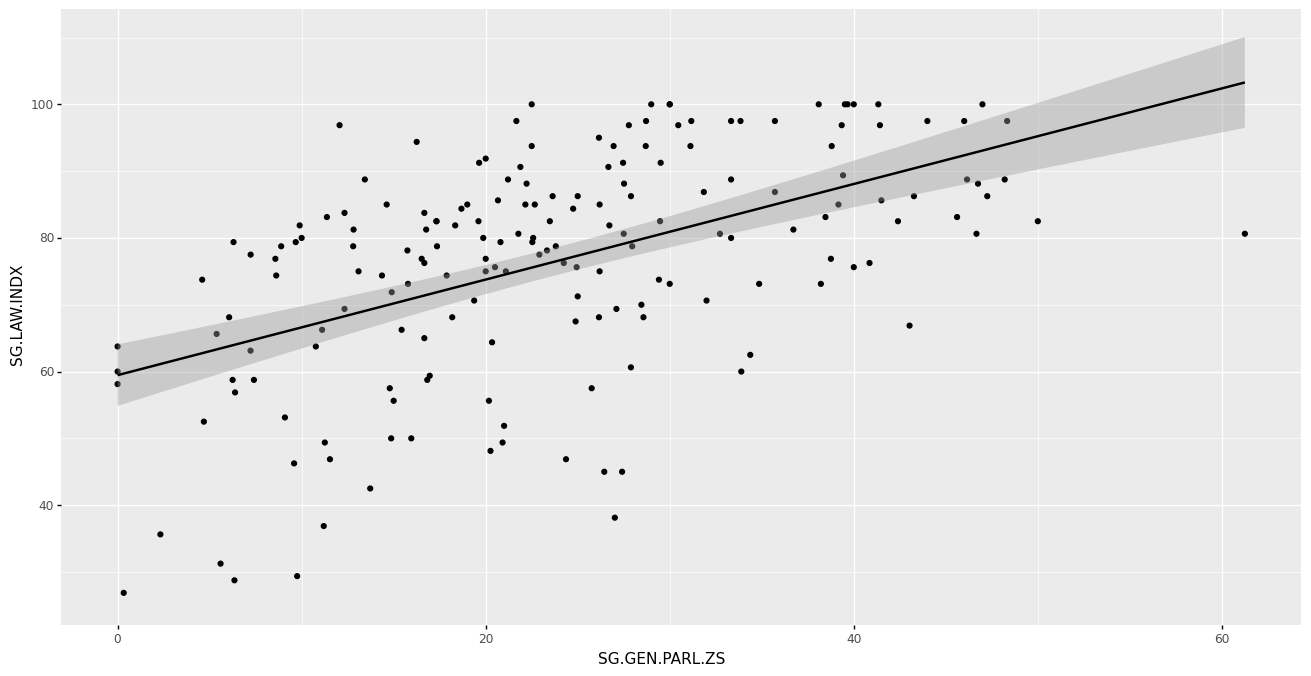

<ggplot: (155214461468)>

In [131]:
# extract the aiming data
gender_zs = gender.query('`Series Code` == "SG.GEN.PARL.ZS"')
gender_indx = gender.query('`Series Code` == "SG.LAW.INDX"')
gender_2020 = pd.merge(
    left=gender_zs[["Country Code", "2020 [YR2020]"]],
    right=gender_indx[["Country Code", "2020 [YR2020]"]],
    left_on="Country Code",
    right_on="Country Code"
).rename(columns={"Country Code": "Country Code", "2020 [YR2020]_x": "SG.GEN.PARL.ZS", "2020 [YR2020]_y": "SG.LAW.INDX"})

# plot with plotnine
ggplot(gender_2020, aes('SG.GEN.PARL.ZS', 'SG.LAW.INDX')) + \
    geom_point() + \
    geom_smooth(method='lm') + \
    theme(figure_size=(16, 8))

### Question 4: (10 points) Visualize the evolution of the proportion of women in the legislature in the United States over the years using a line plot

Hint: You can use the pandas *melt* function to convert columns to rows

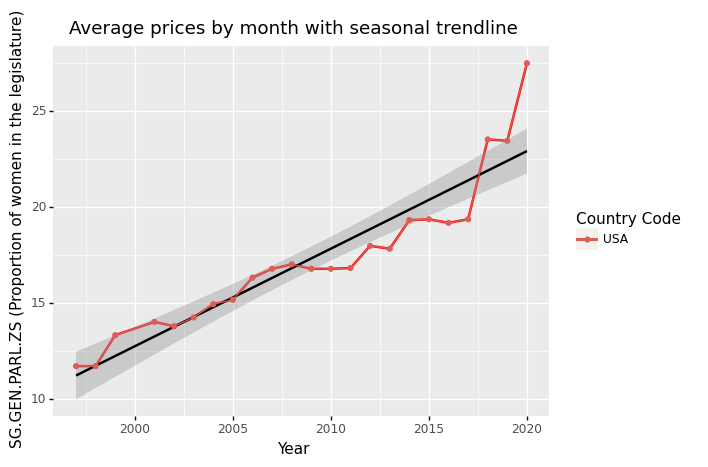

<ggplot: (155215873380)>

In [129]:
# data manipulation
gender_zs_prop = pd.melt(gender_zs,
                         id_vars=["Country Name", "Country Code"],
                         value_vars=gender_zs.columns[5:])
gender_zs_prop["year"] = [int(y[:4]) for y in gender_zs_prop["variable"]]
gender_zs_usa = gender_zs_prop.query('`Country Code` == "USA"').dropna()

# line plot
avg = stat_summary(aes(group = 1), fun_y = np.mean, geom = "line", colour = "red", size = 1, na_rm = True) 
line = geom_smooth(aes(group = 1), method='lm')
ggplot(gender_zs_usa, aes('year', 'value')) + \
    avg + line + \
    ggtitle("Average prices by month with seasonal trendline") + \
    geom_line(aes(color = 'Country Code')) + \
    geom_point(aes(color = 'Country Code')) + \
    labs(x='Year', y='SG.GEN.PARL.ZS (Proportion of women in the legislature)')

### Question 5: (20 points) Create the visualization from Q4 for the 10 most populus countries in the world (China, India, US, Indonesia, Pakistan, Brazil, Nigeria, Bangladesh, Russia, Mexico) using a facet grid from plotnine. Remember to format the figure for reability. What are your observations?

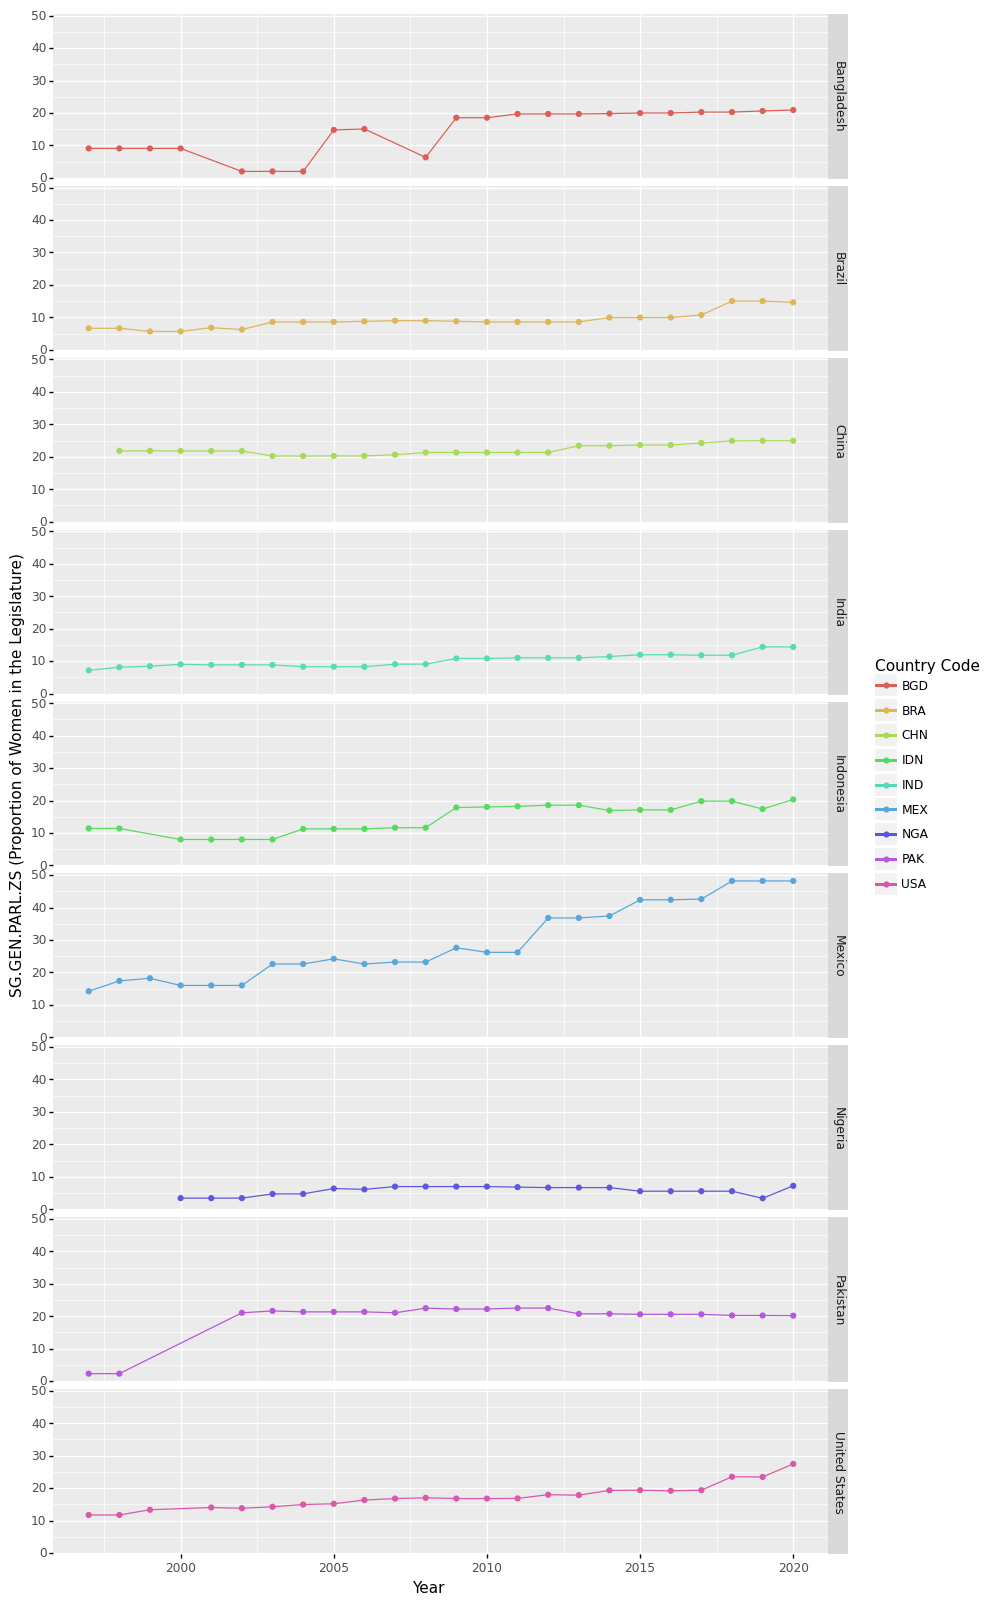

<ggplot: (155215518139)>

In [138]:
# data manipulation
pop_country_list = ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico']
gender_zs_10 = gender_zs[gender_zs["Country Name"].isin(pop_country_list)]
gender_melt_10 = pd.melt(gender_zs_10,
                         id_vars=["Country Name", "Country Code"],
                         value_vars=gender_zs_10.columns[5:])
gender_melt_10["year"] = [int(y[:4]) for y in gender_melt_10["variable"]]
gender_melt_10 = gender_melt_10.dropna()

# line plot
ggplot(gender_melt_10, aes(x='year', y='value')) + \
    geom_line(aes(color = 'Country Code')) + \
    geom_point(aes(color = 'Country Code')) + \
    facet_grid('Country Name ~ .') + \
    labs(x='Year', y='SG.GEN.PARL.ZS (Proportion of Women in the Legislature)') + \
    theme(figure_size=(10, 20))

According to the line plots above, here are my observations:

+ The proportion of women in the legislature in each country appears to have an incresing tendency over the past 60 years (from 1960 to 2020).
+ Among all 10 most populous countries, the one with fastest growth in proportion is Maxico. While in China, Inida and Nigeria, the proportion growth was slow, even stay steady.

## Part 3: Domestic Air Travel in the United States

In [149]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [150]:
airline = pd.read_csv('us_domestic_airline_passengers.csv')
airline.head()

,Period,Passengers
0,January 2002,38499
1,February 2002,38561
2,March 2002,48397
3,April 2002,45358
4,May 2002,47050


### Question 6: (10 points) Load the airline passenger dataset. Using plotnine, visualize the monthly time series of the number of domestic passengers with overlayed point and line plots. Format and label the plot to be readable.

Hint: You can use the mizani package to generate the axis breaks and formatted labels

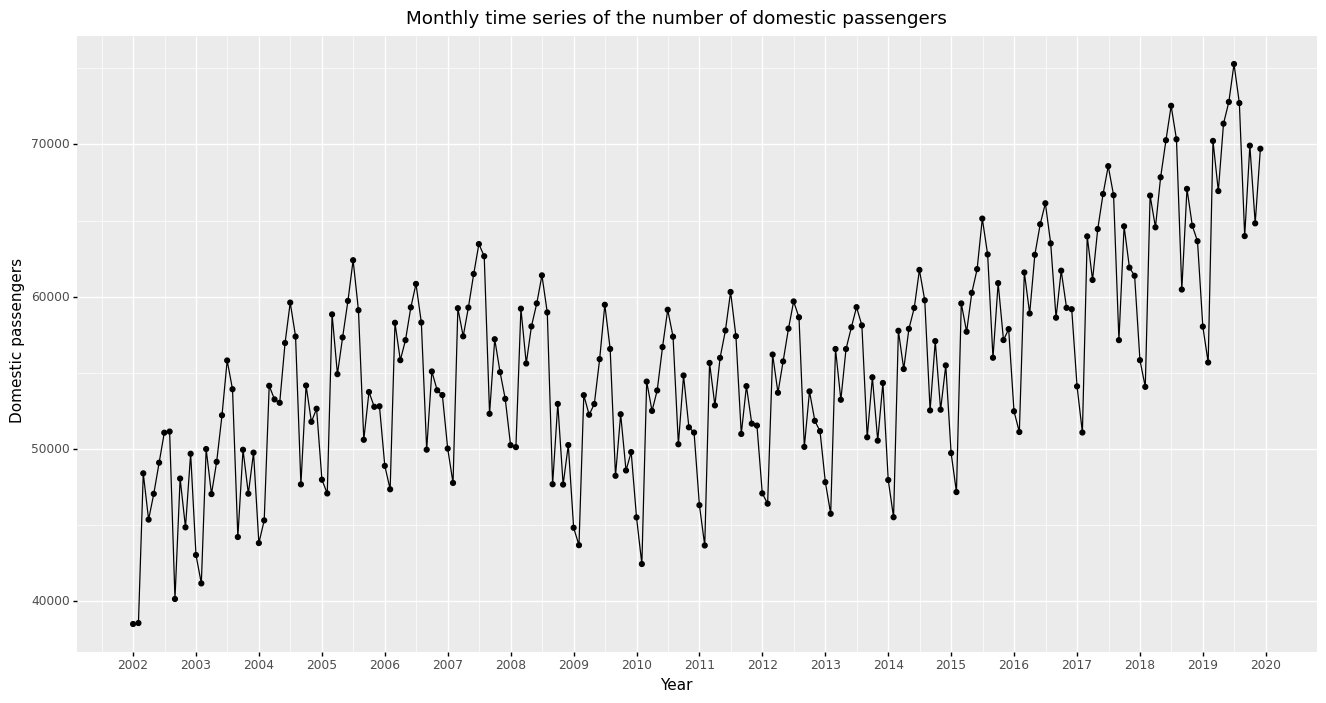

<ggplot: (155220226597)>

In [157]:
airline['Period'] = pd.to_datetime(airline['Period'])
# plot
ggplot(airline, aes(x='Period', y='Passengers')) + \
    geom_point() + \
    geom_line() + \
    scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%Y')) + \
    labs(x='Year', y='Domestic passengers') + \
    ggtitle("Monthly time series of the number of domestic passengers") + \
    theme(figure_size=(16, 8))

### Question 7: (15 points) Remove the monthly seasonal effect from the passenger time series and plot the adjusted passenger (mean + residual) time series. What do you observe? 

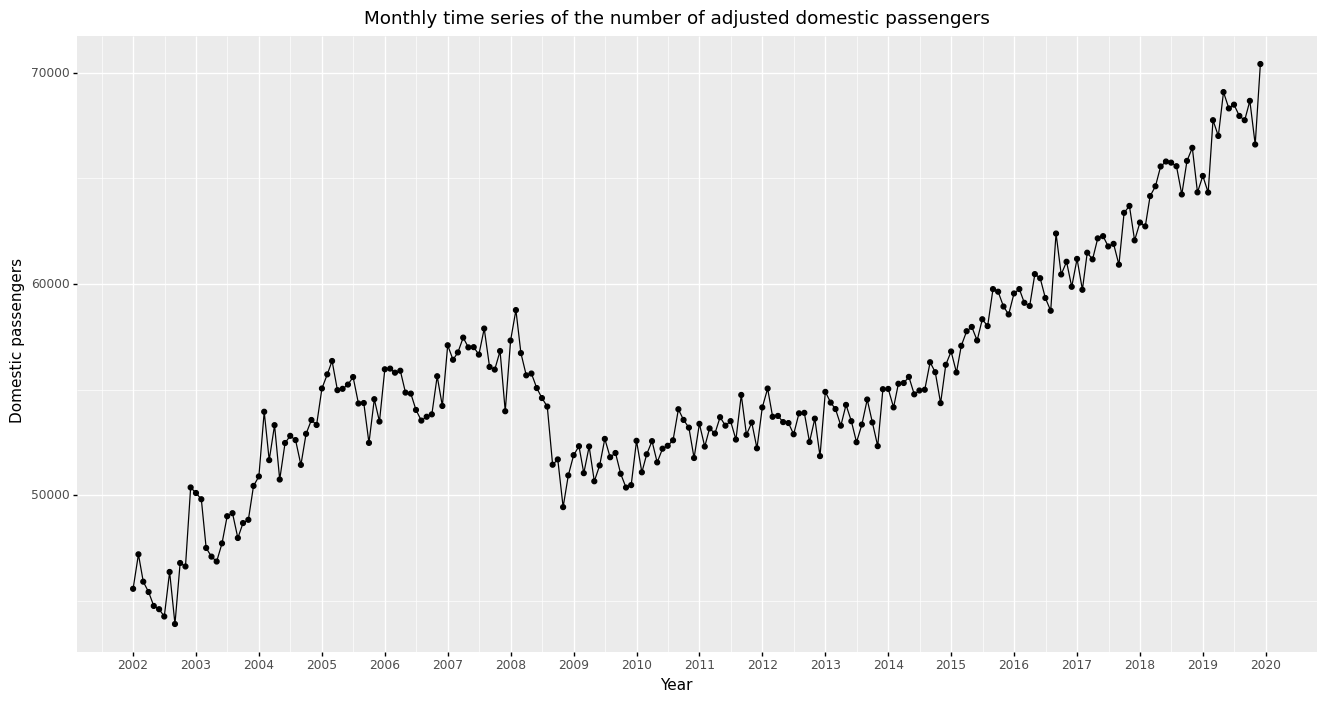

<ggplot: (155220357521)>

In [163]:
airline['year'] = airline['Period'].dt.year
airline['month'] = airline['Period'].dt.month
model = smf.ols('Passengers ~ C(month)', data=airline).fit()
airline['Passengers_adjusted'] = model.resid + airline['Passengers'].mean()

# plot
ggplot(airline, aes(x='Period', y='Passengers_adjusted')) + \
    geom_point() + \
    geom_line() + \
    scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%Y')) + \
    labs(x='Year', y='Domestic passengers') + \
    ggtitle("Monthly time series of the number of adjusted domestic passengers") + \
    theme(figure_size=(16, 8))

After removing the monthly seasonal effect from the passenger time series, I plot the line plot above. Here are my obervations:

+ The adjusted domestic passengers number has an overall increasing tendencey over the past 20 yeas (from 2002 to 2020).
+ There is a sudden drop from 2008 to 2009, indicating that there may be a worldwide event that affected flights.
+ Besides that sudden drop, the number of adjusted domestic passengers grew steadily without the monthly seasonal effect.

## What to submit

* The jupyter notebook file named 'uniquename_si618_lab9_.ipynb'
* The HTML or PDF report generated by your notebook file that should similar to si618_lab9_solution.html